In [1]:
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataknn =pd.read_csv('datalatihfix.csv')
dataknn.head(10)

,Unnamed: 0,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,beds,Entire home/apt,...,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,price
0,0,3,1.0,1,1,1,0,1.0,1.0,1,...,0,0,0,1,0,0,1,0,0,150.0
1,1,7,1.0,1,1,0,1,3.0,3.0,1,...,0,0,0,1,0,0,1,0,0,169.0
2,2,5,1.0,1,1,1,1,1.0,3.0,1,...,0,0,0,1,0,1,0,0,0,145.0
3,3,4,1.0,1,1,1,0,2.0,2.0,1,...,0,0,0,1,1,0,0,0,0,750.0
4,4,2,1.0,1,1,1,1,0.0,1.0,1,...,0,0,0,1,0,1,0,0,0,115.0
5,5,2,1.0,1,1,1,1,1.0,1.0,0,...,0,0,0,1,0,0,1,0,0,85.0
6,6,2,1.0,1,1,1,0,1.0,1.0,1,...,0,0,0,1,0,1,0,0,0,120.0
7,7,2,1.0,1,1,0,0,1.0,1.0,0,...,0,0,0,1,0,1,0,0,0,120.0
8,8,2,1.0,1,1,1,0,1.0,1.0,0,...,0,0,0,1,0,0,1,0,0,100.0
9,9,2,1.0,1,1,0,0,1.0,1.0,0,...,0,0,0,1,1,0,0,0,0,70.0


In [3]:
# membagi data menjadi dua bagian
from sklearn.model_selection import train_test_split
train , test = train_test_split(dataknn, test_size = 0.3)

In [4]:
# Membuat data frame variabel prediktor dan variabel respon
x_train = train.drop(['price','Unnamed: 0'], axis=1)
y_train = train['price']

x_test = test.drop(['price','Unnamed: 0'], axis = 1)
y_test = test['price']

In [5]:
# scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.200000,0.200000,1.0,1.0,1.0,0.0,0.2,0.058824,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.200000,0.200000,1.0,1.0,0.0,0.0,0.2,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.400000,0.200000,1.0,1.0,1.0,0.0,0.3,0.176471,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.066667,1.0,1.0,1.0,0.0,0.1,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.066667,0.066667,0.0,1.0,1.0,0.0,0.1,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [6]:
# tuning parameter k
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #membuat model
    pred=model.predict(x_test) #membuat prediksi data test
    error = sqrt(mean_squared_error(y_test,pred)) #menghitung rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 168.04206817996706
RMSE value for k=  2 is: 152.9967774003629
RMSE value for k=  3 is: 140.75407369757778
RMSE value for k=  4 is: 135.2847983056839
RMSE value for k=  5 is: 132.30818414262515
RMSE value for k=  6 is: 130.94920401416286
RMSE value for k=  7 is: 129.93730483258923
RMSE value for k=  8 is: 129.74829008579155
RMSE value for k=  9 is: 129.42745816094916
RMSE value for k=  10 is: 129.09301855145185
RMSE value for k=  11 is: 128.9545362261606
RMSE value for k=  12 is: 129.02004822382418
RMSE value for k=  13 is: 128.50023273240416
RMSE value for k=  14 is: 128.49812478556188
RMSE value for k=  15 is: 128.30985474425017
RMSE value for k=  16 is: 128.29327867005222
RMSE value for k=  17 is: 128.2732714191635
RMSE value for k=  18 is: 128.17579265045126
RMSE value for k=  19 is: 128.21176462218273
RMSE value for k=  20 is: 128.5390116748498


<AxesSubplot:>

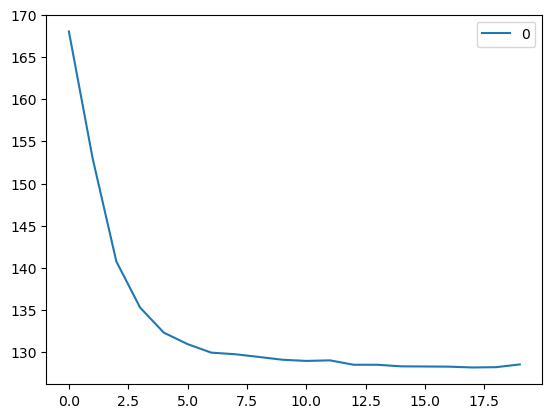

In [7]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [12]:
dataknnuji =pd.read_csv('dataujifix.csv')
dataknnuji.head()

,Unnamed: 0,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,beds,...,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60
0,0,17423675,4,2.0,1,1,1,0,2.0,2.0,...,0,0,0,0,1,0,0,1,0,0
1,1,6226658,2,2.0,1,1,1,0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
2,2,3563677,4,1.0,1,1,1,1,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
3,3,17615783,2,1.0,1,1,1,0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
4,4,2479317,4,1.0,1,1,0,0,1.0,2.0,...,0,0,0,0,1,0,1,0,0,0


In [13]:
# k terbaik adalah 19
x = dataknnuji.drop(['id','Unnamed: 0'], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.200000,0.250,1.0,1.0,1.0,0.0,0.2,0.1250,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.066667,0.250,1.0,1.0,1.0,0.0,0.1,0.0625,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.200000,0.125,1.0,1.0,1.0,1.0,0.1,0.0625,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.066667,0.125,1.0,1.0,1.0,0.0,0.1,0.0625,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.200000,0.125,1.0,1.0,0.0,0.0,0.1,0.1250,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
X1 = dataknn.drop(['price','Unnamed: 0'], axis=1)
Y1 = dataknn['price']
scaler = MinMaxScaler(feature_range=(0, 1))
X1_scaled = scaler.fit_transform(X1)
X1 = pd.DataFrame(X1_scaled)

In [15]:
modelknn = neighbors.KNeighborsRegressor(n_neighbors = 19)
modelknn.fit(X1, Y1)  #membuat model
price=modelknn.predict(x) # prediksi price data baru

In [16]:
dataknnuji['price'] = price

In [17]:
r2 = modelknn.score(X1, Y1)
r2

0.45199184915572455

In [18]:
dataknnuji.head()

,Unnamed: 0,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,bedrooms,beds,...,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30,super_strict_60,price
0,0,17423675,4,2.0,1,1,1,0,2.0,2.0,...,0,0,0,1,0,0,1,0,0,276.526316
1,1,6226658,2,2.0,1,1,1,0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,74.684211
2,2,3563677,4,1.0,1,1,1,1,1.0,1.0,...,0,0,0,1,0,1,0,0,0,139.526316
3,3,17615783,2,1.0,1,1,1,0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,82.789474
4,4,2479317,4,1.0,1,1,0,0,1.0,2.0,...,0,0,0,1,0,1,0,0,0,167.789474


In [19]:
submission = pd.read_csv('submission.csv')

In [20]:
submission['id'] = dataknnuji['id']
submission['price'] = dataknnuji['price']

In [21]:
submission.head()

,id,price
0,17423675,276.526316
1,6226658,74.684211
2,3563677,139.526316
3,17615783,82.789474
4,2479317,167.789474


In [22]:
submission.to_csv('submit_KNN_model.csv',index=False)